In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
# Load dataset required for KNN,# Import necessary libraries for data manipulation, visualization, model building, and evaluation
import pandas as pd
df = pd.read_csv('/content/Zoo.csv')
df


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
df.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [ ]:
df.shape

(101, 18)

In [ ]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
# Drop the 'animal name' column as it's not useful for classification, Drop the 'animal name' column as it's not useful for classification
# Animal names are unique identifiers but don't contribute to the classification task
data_cleaned = data.drop(columns=['animal name'])
data_cleaned

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
# Separate features and target variable, # Separate features (X) and target variable (y)
# X: Feature matrix, y: Target labels (animal type)
X = data_cleaned.drop(columns=['type'])
y = data_cleaned['type']

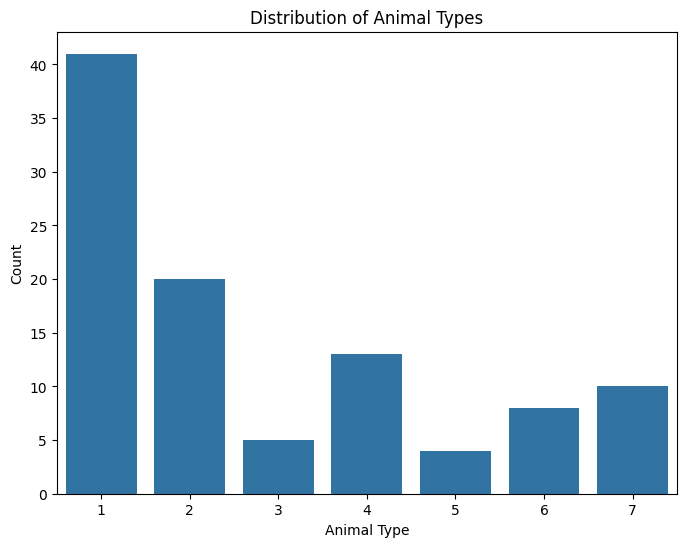

In [ ]:
# Visualize the distribution of the target variable,
# Visualize the distribution of the target variable
# This helps understand class balance and whether the dataset is imbalanced
plt.figure(figsize=(8,6))
sns.countplot(x=y)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

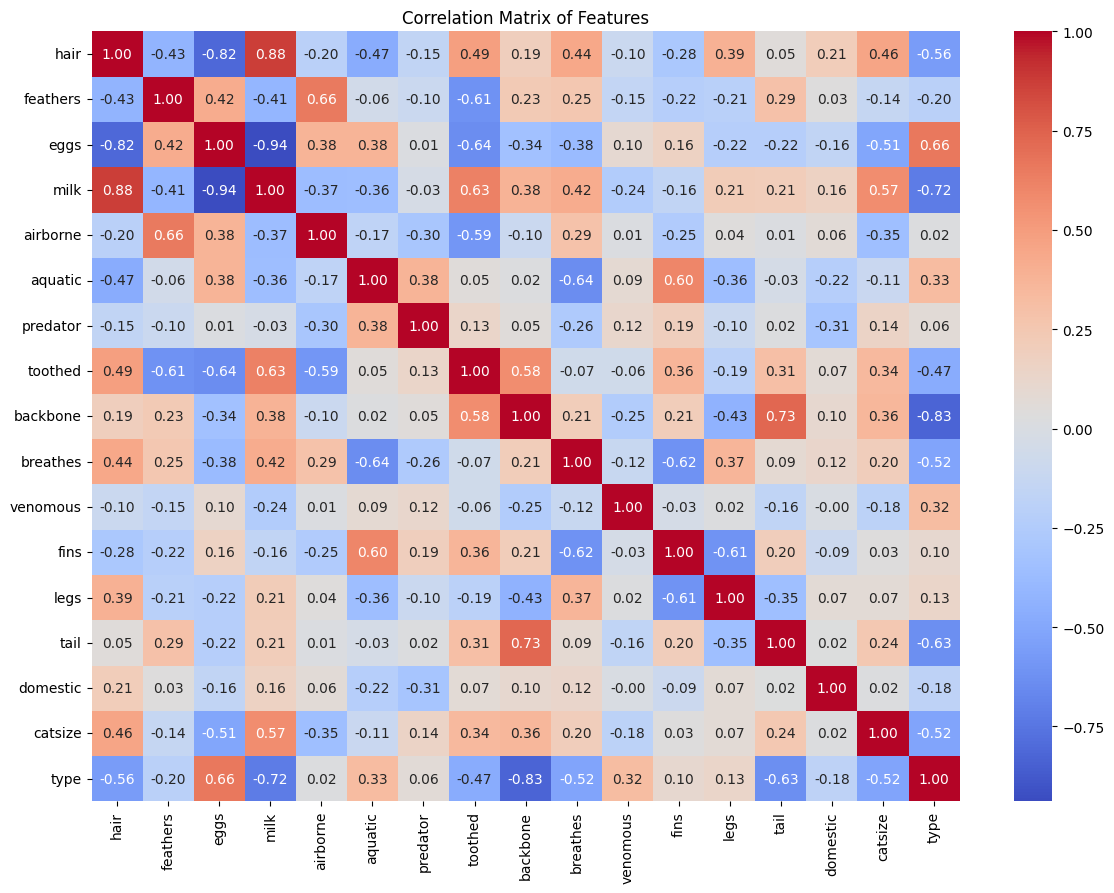

In [ ]:
# Visualize correlations,
#Visualize correlations between features
# Helps to understand relationships between variables (which features are correlated)
plt.figure(figsize=(14,10))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
DATA PROCESSING

In [ ]:
# Split the dataset into 80% training and 20% testing,
# Split the dataset into 80% training and 20% testing
# The split ensures the model is trained on 80% of the data and tested on 20% to evaluate performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (important for KNN)
# Normalize the features
# Standardization is important for distance-based algorithms like KNN because it ensures that all features contribute equally to the distance computation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit and transform training data
X_test_scaled = scaler.transform(X_test) # Only transform testing data (avoid data leakage)


In [ ]:
IMPLEMENTING KNN ALGORITHIM

In [ ]:
# Train K-Nearest Neighbors with K=5 and Euclidean distance,
# Train K-Nearest Neighbors with K=5 and Euclidean distance
# KNN is a simple and effective classification algorithm that assigns the majority class of the nearest neighbors to a data point
# K=5 means we consider the 5 nearest neighbors, and 'euclidean' is the distance metric used
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

# Predict on the test set
# Predict on the test set
# The model is used to make predictions on the unseen test data
y_pred = knn.predict(X_test_scaled)
knn

KNeighborsClassifier(metric='euclidean')

In [ ]:
EVALUATE THE MODEL

In [ ]:
# Evaluate the model
# Evaluate the model using common classification metrics: accuracy, precision, recall, and F1-score
# Accuracy: The proportion of correctly predicted instances
# Precision: How many of the predicted positive instances were correct
# Recall: How many actual positives were correctly identified
# F1-Score: Harmonic mean of precision and recall, especially useful when classes are imbalanced
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print evaluation metrics to assess model performance
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1-Score: 0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14

In [ ]:
VISUALISING THE DECISION BOUNDAIRES

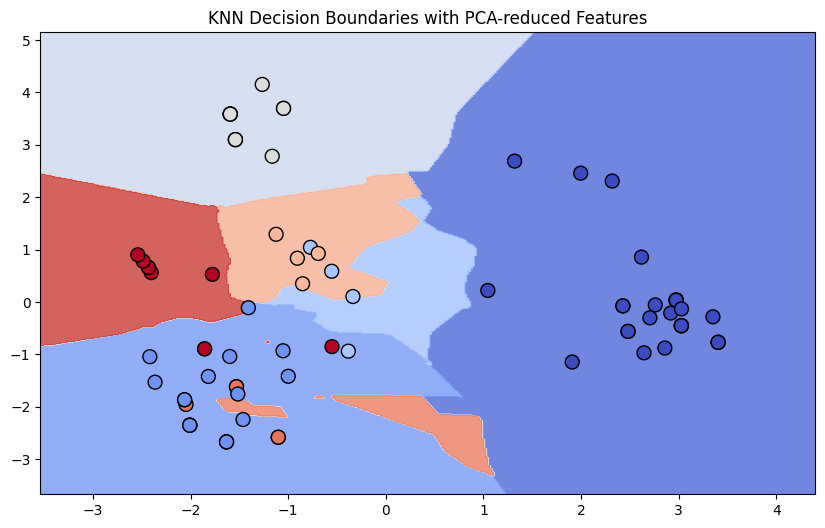

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Reduce the feature space to 2 dimensions using PCA
# Visualizing decision boundaries in high-dimensional data is difficult, so we'll reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train KNN on the reduced 2D dataset
knn_pca = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_pca.fit(X_train_pca, y_train)

# Plot decision boundaries
# Function to visualize decision boundaries in a 2D space
def plot_decision_boundaries(X, y, model):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('KNN Decision Boundaries with PCA-reduced Features')
    plt.show()

# Visualize decision boundaries
plot_decision_boundaries(X_train_pca, y_train, knn_pca)



In [ ]:
Interview Questions:
Key hyperparameters in KNN:

n_neighbors: The number of neighbors to consider (K).

metric: The distance metric used to compute the nearest neighbors (e.g., Euclidean, Manhattan).

weights: Whether to weight the neighbors uniformly or based on distance.

Distance metrics in KNN:

Euclidean: The straight-line distance between points.

Manhattan: The sum of absolute differences between the coordinates.

Minkowski: A generalization of both Euclidean and Manhattan.

Hamming: Used for categorical variables.